In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torchvision.transforms as transforms
import torchvision.datasets as datas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [3]:
train = datas.MNIST(root = './data/', train = True, download = True, transform = transforms.ToTensor())
test = datas.MNIST(root = './data/', train = False, download = True, transform = transforms.ToTensor())

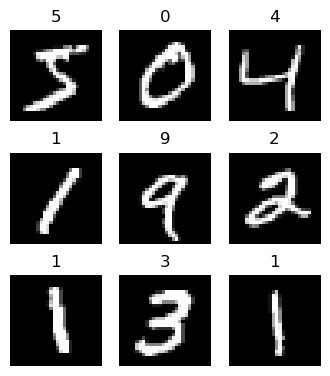

In [4]:
for i in range(9):
    image = train[i][0].numpy().squeeze()
    plt.subplot(3,3,i+1)
    plt.gcf().set_size_inches(4,4.5)
    plt.gca().axis('off')
    plt.imshow(image, cmap = 'gray') 
    plt.title(train[i][1])
#     print(train[i][1], end = ',')

In [5]:
total_batch = len(train)
data_per_batch = 500
batches = int(total_batch / data_per_batch)
iterations = 1500
epoch = int(iterations / data_per_batch)
batches

120

In [6]:
train_loader = DataLoader(train, batch_size = batches, shuffle = True)
validation_loader = DataLoader(test, batch_size = 5000, shuffle = False)

In [7]:
class classifying_model(nn.Module):
    def __init__(self, input_shapes, output_shapes):
        super(classifying_model, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 4, stride = 1, padding = 0)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 2)
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 4, stride = 1, padding = 0)
        
        self.fc = nn.Sequential(
                        nn.Linear(32*4*4, 225),
                        nn.ReLU(inplace = True),
                        nn.BatchNorm1d(225),
                        nn.Linear(225, output_shapes)
                        )
    def forward(self, x):
        out = self.maxpool(self.relu(self.conv1(x)))
        out = self.maxpool(self.relu(self.conv2(out)))
        out = out.view(out.shape[0], -1)
        out = self.fc(out)
        return out

In [8]:
input_size = 28 * 28
learning_rate = 0.1

In [9]:
model = classifying_model(input_shapes = input_size, output_shapes = 10)
# model2 = CNNModel()


In [10]:
i, j = next(iter(train_loader))
i.view(-1, 28*28).shape

torch.Size([120, 784])

In [11]:
def training(model,train_loader, validation_loader, epoch = 6, batches = 120):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    print('started')
    itera = 0
    loss_list = []
    accuracy_list = []
    for i in range(epoch):
        for n, (images, label) in enumerate(train_loader):
    #         images = Variable(images.view(-1, 28 * 28))
            model.train()
            optimizer.zero_grad()
            pred = model(images)
            _, predictions = torch.max(pred, 1)
            accuracy = accuracy_score(predictions, label)
            loss = criterion(pred, label)
            loss.backward()
            optimizer.step()
            itera += 1
            if n % 300 == 0:
                for j, (images, label) in enumerate(validation_loader):
    #                 images = Variable(images.view(-1, 28 * 28))
                    model.eval()
                    pre = model(images)
                    _, predictions = torch.max(pre, 1)
                    test_accuracy = accuracy_score(predictions, label)
                    test_loss = criterion(pre, label)


                print(f'{itera} | training_loss ---> {loss:.4f} | train_acc ---> {accuracy:.4f} | test_acc ---> {test_accuracy:.4f} | validating_loss ---> {test_loss:.4f}')
            loss_list.append(loss.data)
            accuracy_list.append(accuracy)
    print('finished')            
    return model, [loss_list, test_loss], [accuracy_list, test_accuracy], predictions, label

In [12]:
def plot_acc(loss_list, accuracy_list):# Plot the loss and accuracy
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(loss_list,color=color)
    ax1.set_xlabel('epoch',color=color)
    ax1.set_ylabel('total loss',color=color)
    ax1.tick_params(axis='y', color=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  
    ax2.plot( accuracy_list, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()


## checking out some predictions made

In [13]:
# print(predictions[:25])
# print(label[:25])
# for i in range(25):
#     plt.subplot(5,5,i+1 % 5)
#     im = images[i].view(28, 28)
#     plt.imshow(im)

## checking the wrong predictions made

In [14]:
# import math
# print(f' wrong predicted === {predictions[predictions != label]}')
# print(f'correct label === {label[predictions != label]}')
# n_wrong = images[predictions != label].shape[0]
# root = math.ceil(math.sqrt(n_wrong))
# for i in range(n_wrong):
#     plt.subplot(root, root,i+1 % 5)
#     im = images[predictions != label][i].view(28, 28)
#     plt.imshow(im)

In [15]:
# import torchvision
# def show(img):
#     """Show PyTorch tensor img as an image in matplotlib."""
#     npimg = img.cpu().detach().numpy()
#     plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
#     plt.grid(False)
#     plt.gca().axis('off')
    
# def display_thumb(img):
#   display.display(transforms.Resize(128)(img))

# assert model.fc[3].weight.shape == (10, 15 * 15)
# show(torchvision.utils.make_grid(
#     model.fc[3].weight.view(10, 1, 15, 15),
#     normalize=True,
#     nrow=5,
# ))

In [16]:
# plt.imshow(images[0].view(28, 28))

started
1 | training_loss ---> 2.4652 | train_acc ---> 0.0917 | test_acc ---> 0.1728 | validating_loss ---> 2.2757
301 | training_loss ---> 0.0526 | train_acc ---> 0.9833 | test_acc ---> 0.9880 | validating_loss ---> 0.0500
501 | training_loss ---> 0.0705 | train_acc ---> 0.9667 | test_acc ---> 0.9926 | validating_loss ---> 0.0350
801 | training_loss ---> 0.0156 | train_acc ---> 1.0000 | test_acc ---> 0.9902 | validating_loss ---> 0.0355
1001 | training_loss ---> 0.0122 | train_acc ---> 0.9917 | test_acc ---> 0.9914 | validating_loss ---> 0.0298
1301 | training_loss ---> 0.0547 | train_acc ---> 0.9750 | test_acc ---> 0.9922 | validating_loss ---> 0.0265
1501 | training_loss ---> 0.0293 | train_acc ---> 0.9917 | test_acc ---> 0.9916 | validating_loss ---> 0.0293
1801 | training_loss ---> 0.0320 | train_acc ---> 0.9917 | test_acc ---> 0.9946 | validating_loss ---> 0.0195
2001 | training_loss ---> 0.0092 | train_acc ---> 0.9917 | test_acc ---> 0.9930 | validating_loss ---> 0.0218
2301 | t

['model.pkl']

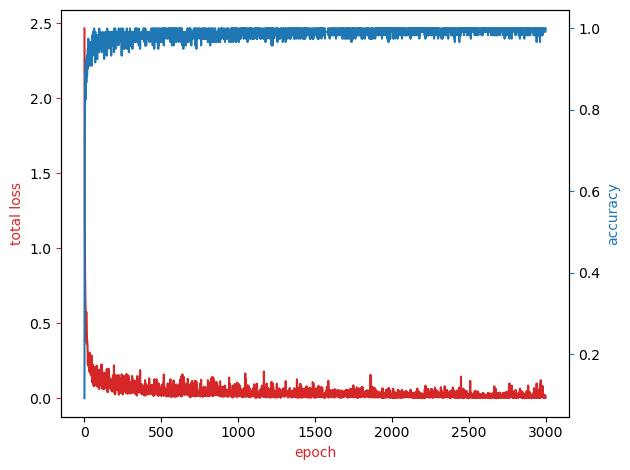

In [17]:
if __name__ == '__main__':
    model, [loss_list, test_loss], [accuracy_list, test_accuracy], predictions, label  = training(model, train_loader, validation_loader)
    plot_acc(loss_list, accuracy_list)
    
    # Save the entire model
import joblib
joblib.dump(model, 'model.pkl')